In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [64]:
datagen_train = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=False, rotation_range=30.0)

In [65]:
datagen_val = ImageDataGenerator(rescale=1./255)

In [66]:
train_gen = datagen_train.flow_from_directory('dogscats/train/',
                                        target_size = (197,197),
                                        batch_size = 256,
                                        shuffle = True,
                                        class_mode='binary'
                                       )

Found 23000 images belonging to 2 classes.


In [67]:
val_gen = datagen_val.flow_from_directory('dogscats/valid/',
                                      target_size = (197,197),
                                      batch_size = 256,
                                      shuffle = True,
                                      class_mode='binary'
                                       )

Found 2000 images belonging to 2 classes.


In [68]:
from matplotlib import pyplot as plt

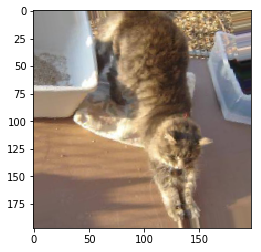

In [72]:
images_batch = next(train_gen)[0]
plt.imshow(images_batch[-1])
plt.show()

In [73]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16

In [74]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, BatchNormalization, Activation

In [75]:
inp = Input(shape=(197,197,3))

In [76]:
VGG16_model = VGG16(include_top=False, weights='imagenet', input_shape=(197,197,3))
VGGout = VGG16_model(inp)

In [77]:
for layer in VGG16_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fd0ec7025f8> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec72a898> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6c3dd8> True
<keras.layers.pooling.MaxPooling2D object at 0x7fd0ec72a828> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6d6be0> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6f6cc0> True
<keras.layers.pooling.MaxPooling2D object at 0x7fd0ec689a90> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6ac8d0> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6ac668> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec656e10> True
<keras.layers.pooling.MaxPooling2D object at 0x7fd0ec668da0> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec1d3978> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec1d3fd0> True
<keras.layers.convolutional.Conv2D object at 0x7fd0ec1fcd30> True
<keras.layers.pooling.MaxPooling2D object at 0x7fd0ec192e80> True
<keras.

In [78]:
for layer in VGG16_model.layers:
    layer.trainable = False
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fd0ec7025f8> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec72a898> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6c3dd8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd0ec72a828> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6d6be0> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6f6cc0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd0ec689a90> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6ac8d0> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec6ac668> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec656e10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd0ec668da0> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec1d3978> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec1d3fd0> False
<keras.layers.convolutional.Conv2D object at 0x7fd0ec1fcd30> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd0ec192e80>

In [79]:
VGGout.shape.dims

[Dimension(None), Dimension(6), Dimension(6), Dimension(512)]

In [80]:
x = Flatten(input_shape=(6, 6, 512))(VGGout)
x = BatchNormalization()(x)
x = Dense(100)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(1, activation='sigmoid')(x)

In [81]:
model = Model(inp, x)

In [82]:
# model = ResNet50(include_top=False, weights='imagenet', input_shape=(197,197,3))

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 197, 197, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 18432)             73728     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1843300   
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
__________

In [84]:
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
from fnn_helper import PlotLosses

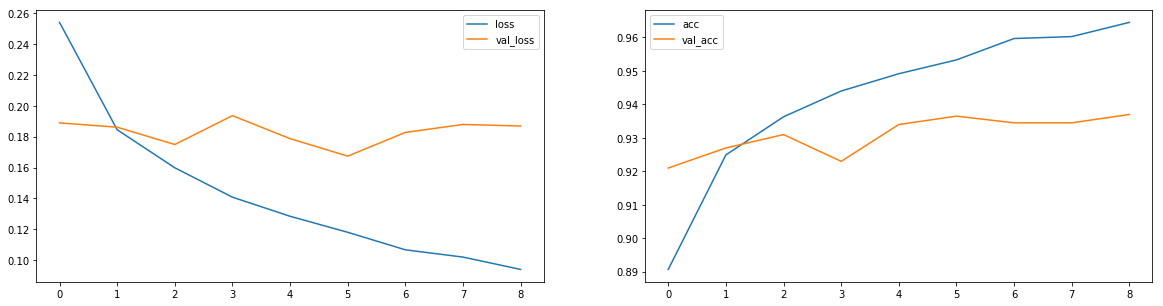

Epoch 10/100
16/90 [====>.........................] - ETA: 1:46 - loss: 0.0874 - acc: 0.9675

KeyboardInterrupt: 

In [86]:
model.fit_generator(train_gen,
          epochs=100,
            validation_data = val_gen,
            callbacks=[PlotLosses(1, evaluate_interval=None)])